Title of the post : CC Rainbow (i installed bridge just for this)


-------------0 top level comment start--------------
Man that Photoshop logo really bothers me
- Same bro, don’t know why I didn’t replace it with something else
Over all Sentiment of Topic by TextBlob : {'negative': 0, 'positive': 1, 'neutral': 2}
Over all Sentiment of Topic by VADER : {'negative': 1, 'positive': 0, 'neutral': 2}






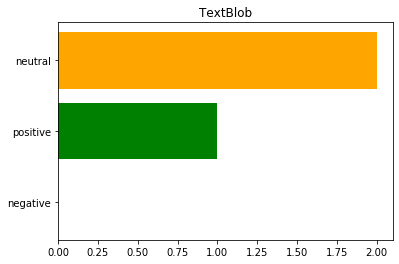

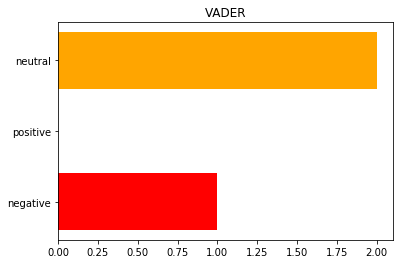

Title of the post : Creative Cloud Waving Monthly Fees for 2 Months


-------------0 top level comment start--------------
You’re the real MVP.
-------------1 top level comment start--------------
What if I have pre paid for 12 months?
- Doesn't apply I believe.
-- Yeah, sadly. I tried but no luck
-------------2 top level comment start--------------
Watch out though, Adobe's pretty greedy and the deals you find available in two months might not be the deal you have today. They've been surveying users to find out what pairing of price and features they'll respond positively to, and all of the one appeared to be a compromise of current deals (for example, the Photography bundle of PS, LR, and those mobile apps plus Fresco and others along with 20gb cloud storage looked to not be one they wanted to offer.) I would not be surprised if they're using this as a way to get users out of their current "good" deal so they can stiff them on something shitty in 60 days.
-------------3 top level com

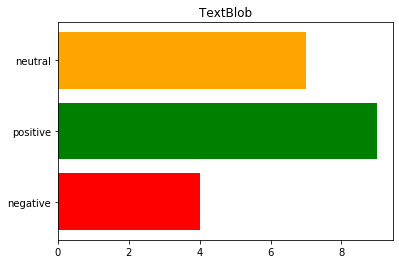

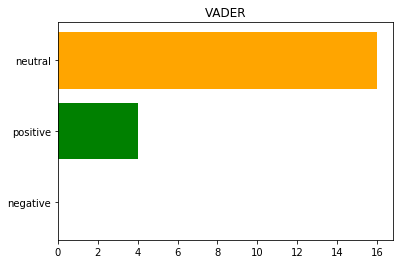

Title of the post : Wouldn't it be cool if CC had an app like this?


-------------0 top level comment start--------------
You can achieve results like this in Photoshop, Animate, and After Effects separately or in conjunction with each other. 
- Illustrator + after effects could knock this out easy af.
Over all Sentiment of Topic by TextBlob : {'negative': 1, 'positive': 2, 'neutral': 0}
Over all Sentiment of Topic by VADER : {'negative': 0, 'positive': 2, 'neutral': 1}






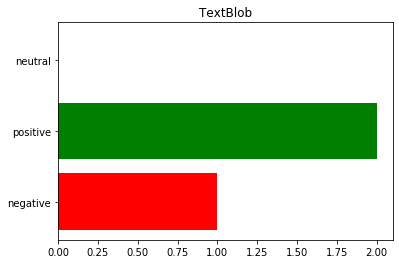

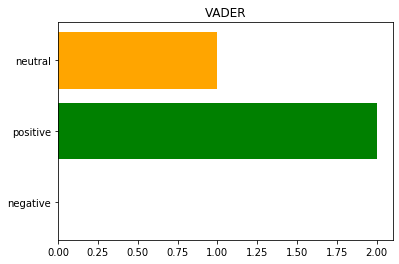

Title of the post : Stay Safe, Stay at Home.


-------------0 top level comment start--------------
dude, i was not expecting that. the sound effects scared me at first as well. So unexpected!
- Ew, they sound like zombies.
-- Yeah! Such a scary sound effect.
Over all Sentiment of Topic by TextBlob : {'negative': 1, 'positive': 3, 'neutral': 0}
Over all Sentiment of Topic by VADER : {'negative': 0, 'positive': 2, 'neutral': 2}






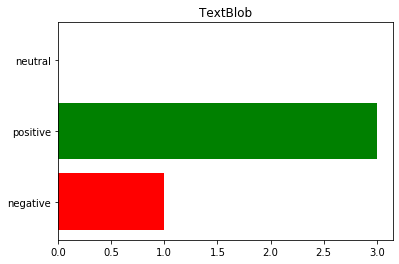

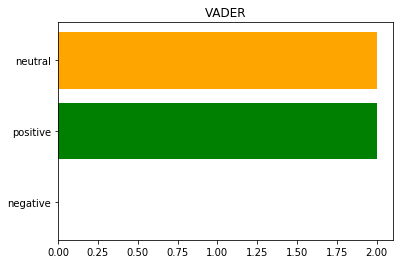

Title of the post : Hi, I am from Asia... I am angry with this new icon. at One time, it make me headache to start working when seen this identical icon.


-------------0 top level comment start--------------
They aren't identical.
Over all Sentiment of Topic by TextBlob : {'negative': 1, 'positive': 0, 'neutral': 1}
Over all Sentiment of Topic by VADER : {'negative': 1, 'positive': 0, 'neutral': 1}






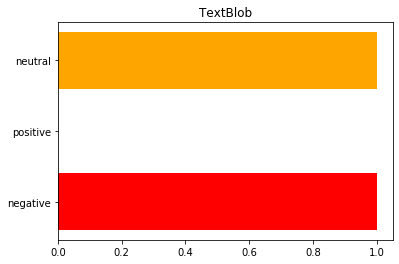

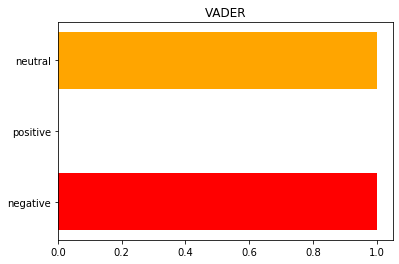

Title of the post : If your computer is suddenly slow, you might want to check if Adobe Core Sync is turned on (I didn't do anything and it still said my CPU was 100% busy)


-------------0 top level comment start--------------
This massive drop was after turning it off
- I think core sync is part of the file syncing system. I know I've had to quit it before fixing issues with the file sync at least, so I'd be concerned it might stop your cc folder from updating. Worthwhile tip though if I need the power and don't care about syncing in the current moment!
Over all Sentiment of Topic by TextBlob : {'negative': 1, 'positive': 1, 'neutral': 1}
Over all Sentiment of Topic by VADER : {'negative': 2, 'positive': 1, 'neutral': 0}






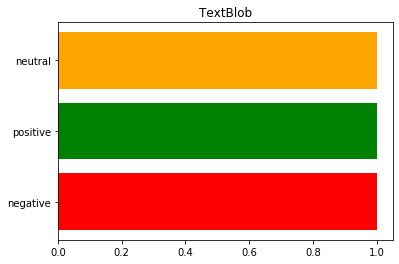

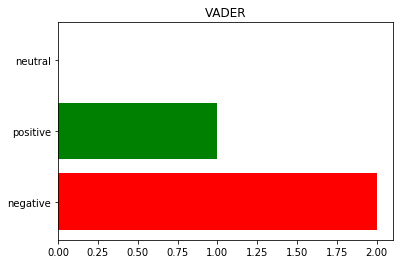

Title of the post : Creative Cloud Alignment Chart


-------------0 top level comment start--------------
Ridiculous, but also hurtful.
-------------1 top level comment start--------------
how exactly is Ai neutral ? it should replace Premiere.
Over all Sentiment of Topic by TextBlob : {'negative': 1, 'positive': 2, 'neutral': 0}
Over all Sentiment of Topic by VADER : {'negative': 1, 'positive': 1, 'neutral': 1}






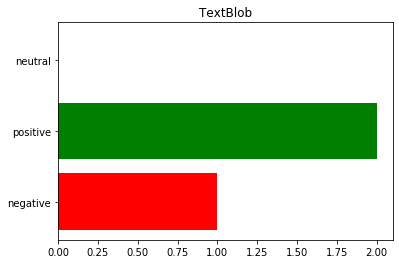

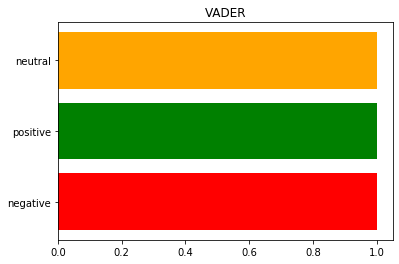

Title of the post : Can anyone help me here? I get this message when I try to log into adobe creative cloud on my Mac book pro..? I allowed creative cloud connections in my firewall but same problem.


-------------0 top level comment start--------------
Note: everything is down.
-------------1 top level comment start--------------
Having the same issue. I'm glad that I'm not the only one (so it means that it's an issue from their side)

But it's really not convenient when you have a deadline coming soon...
-------------2 top level comment start--------------
Just started working for me, after 3+ hrs...perhaps try again?
-------------3 top level comment start--------------
Me too, everything is down. Some of my co workers still have access tho which is infuriating. I wonder if once they close the program it will lock them out.
-------------4 top level comment start--------------
I'm scared ! My XD project disappeared and WHERE IS IT @_@ THIS IS CRAZY
-------------5 top level comment st

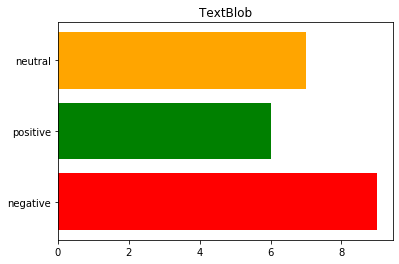

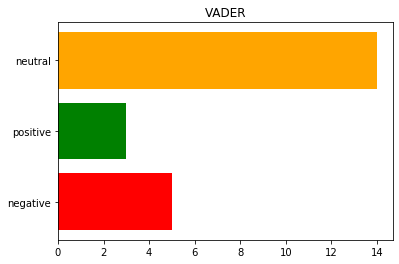

Title of the post : So I just looked at my Adobe account and my price increased from $29.99/m to $49.99/m back in February? Wtf?


-------------0 top level comment start--------------
i was questioning how in the hell you have an account named just mike but i saw it was 12 years old now.. 
-------------1 top level comment start--------------
Isn't 29.99 the student promotional rate?   Maybe when you signed up , you entered an expected graduation date and when that date came around it auto-upped to the regular membership along with regular membership price? 
- That’s what happened to me. Over time I lost the benefits and they just switched me up to the higher price without letting me know
-- That could be it. 
-------------2 top level comment start--------------
I want to know how you've been getting the $29.99/mo 1-year promo deal for four years.
- ????
-- The deal adobe offers is $30 for an introductory year. Then it goes up to $50. You got that deal from 2014-2018. How?!
--- No clue


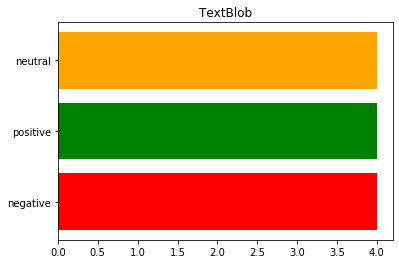

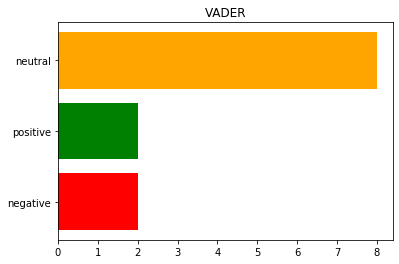

Title of the post : PSA: When you sign up for CC you agree to allow Adobe to change the rate at any time... was "ok" with $39/mo, just noticed rate was increased to $52 several months ago with boiler plate email notification.


-------------0 top level comment start--------------
Sounds like you were on promotional pricing the regular rate is $52
- I signed up in 2016 before it was a promotional price and it was the default price
-- If you have had an account that long you can cancel your plan and they will offer you a better rate during the cancellation process to retain you.
--- I discussed with support my dissatisfaction with the situation and they did indeed offer me a fairly good deal which I took
---- That's great!
Over all Sentiment of Topic by TextBlob : {'negative': 0, 'positive': 4, 'neutral': 2}
Over all Sentiment of Topic by VADER : {'negative': 0, 'positive': 3, 'neutral': 3}






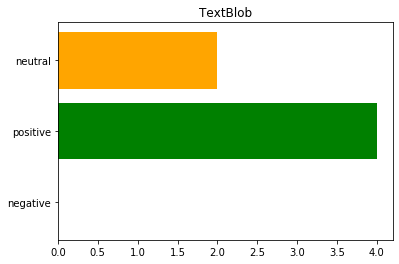

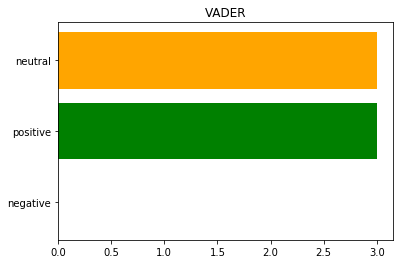

In [61]:
import numpy as np 
import matplotlib.pyplot as plt 
# PRAW, a Python library, to interact with Reddit API.
import praw
#install TextBlob library for processing textual data andsentiment analysis
from textblob import TextBlob
import nltk
# Download VADER, VADER (Valence Aware Dictionary and sEntiment Reasoner) a rule-based sentiment analysis tool
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# create object for VADER sentiment function interaction
sia = SentimentIntensityAnalyzer()

reddit = praw.Reddit(client_id='ThmLaDEf6e3BZA',
                     client_secret='n1LJbrjudo8m0G5UMiSosguAyOg',
                     user_agent='SentScrape')
#create an app and get the required authentication and details.These are mine
# get 10 hot posts from the showerthoughts subreddit
top_posts = reddit.subreddit('creativecloud').top('all', limit=10)
#Replace creativecloud with any subreddit name and replace year with either week,month,day or year
# Sentiment analysis function for TextBlob tools
def text_blob_sentiment(review, sub_entries_textblob):
    analysis = TextBlob(review)
    if analysis.sentiment.polarity >= 0.0001:
        if analysis.sentiment.polarity > 0:
            sub_entries_textblob['positive'] = sub_entries_textblob['positive'] + 1
            return 'Positive'

    elif analysis.sentiment.polarity <= -0.0001:
        if analysis.sentiment.polarity <= 0:
            sub_entries_textblob['negative'] = sub_entries_textblob['negative'] + 1
            return 'Negative'
    else:
        sub_entries_textblob['neutral'] = sub_entries_textblob['neutral'] + 1
        return 'Neutral'
    

# sentiment analysis function for VADER tool
def nltk_sentiment(review, sub_entries_nltk):
    vs = sia.polarity_scores(review)
    if not vs['neg'] > 0.05:
        if vs['pos'] - vs['neg'] > 0:
            sub_entries_nltk['positive'] = sub_entries_nltk['positive'] + 1
            return 'Positive'
        else:
            sub_entries_nltk['neutral'] = sub_entries_nltk['neutral'] + 1
            return 'Neutral'

    elif not vs['pos'] > 0.05:
        if vs['pos'] - vs['neg'] <= 0:
            sub_entries_nltk['negative'] = sub_entries_nltk['negative'] + 1
            return 'Negative'
        else:
            sub_entries_nltk['neutral'] = sub_entries_nltk['neutral'] + 1
            return 'Neutral'
    else:
        sub_entries_nltk['neutral'] = sub_entries_nltk['neutral'] + 1
        return 'Neutral'


# replication of comment section of reddit post
def replies_of(top_level_comment, count_comment, sub_entries_textblob, sub_entries_nltk):
    if len(top_level_comment.replies) == 0:
        count_comment = 0
        return
    else:
        for num, comment in enumerate(top_level_comment.replies):
            try:
                count_comment += 1
                print('-' * count_comment, comment.body)
                text_blob_sentiment(comment.body, sub_entries_textblob)
                nltk_sentiment(comment.body, sub_entries_nltk)
            except:
                continue
            replies_of(comment, count_comment, sub_entries_textblob,sub_entries_nltk)


def main():
    
    for submission in top_posts:
        sub_entries_textblob = {'negative': 0, 'positive' : 0, 'neutral' : 0}
        sub_entries_nltk = {'negative': 0, 'positive' : 0, 'neutral' : 0}
        print('Title of the post :', submission.title)
        text_blob_sentiment(submission.title, sub_entries_textblob)
        nltk_sentiment(submission.title, sub_entries_nltk)
        print("\n")
        submission_comm = reddit.submission(id=submission.id)

        for count, top_level_comment in enumerate(submission_comm.comments):
            print(f"-------------{count} top level comment start--------------")
            count_comm = 0
            try :
                print(top_level_comment.body)
                text_blob_sentiment(top_level_comment.body, sub_entries_textblob)
                nltk_sentiment(top_level_comment.body, sub_entries_nltk)
                replies_of(top_level_comment,
                           count_comm,
                           sub_entries_textblob,
                           sub_entries_nltk)
            except:
                continue


        colors = ['r', 'g', 'orange']
        print('Over all Sentiment of Topic by TextBlob :', sub_entries_textblob)
        print('Over all Sentiment of Topic by VADER :', sub_entries_nltk)
        print("\n\n\n")
    
        labels = list(sub_entries_textblob.keys()) 
        values = list(sub_entries_textblob.values())
        plt.barh(labels, values,align='center',color = colors)
        plt.title('TextBlob')
        plt.show()
        labelsv = list(sub_entries_nltk.keys()) 
        valuesv = list(sub_entries_nltk.values()) 
        plt.barh(labelsv, valuesv,align='center',color = colors)
        plt.title('VADER')
        plt.show()
        
        
         

if __name__ == '__main__' :
    main()